In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
import scipy.stats as stats
%matplotlib inline
import nltk
from nltk.collocations import *

In [2]:
pd.set_option('display.height', 1000) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_columns', 500) 
pd.set_option('display.width', 1000)

height has been deprecated.



In [3]:
raw_data = pd.read_table("amazon_cells_labelled.txt", header=None)

### Data
Data was acuired from the UCI Machine Learning Repository and contains sentences taken from Amazon reviews that are labeled as having either a positive(1) or negative(0) sentenment.  There are 1000 rows of data.  Data from IMDB reviews was also acquired from the same source to use for testing.

link : https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#

In [4]:
# See number of rows in dataset.
len(raw_data)

1000

In [5]:
data = []

In [6]:
raw_data

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [7]:
# Create working copy of data
data = raw_data


In [8]:
data.head()

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [9]:
# Rename columns
data.columns=["sentence","sentiment"]

In [10]:
data["sentence"] = data["sentence"].str.lower()

In [11]:
data['sentence'] = data['sentence'].str.replace('.', ' ')
data['sentence'] = data['sentence'].str.replace(',', ' ')
data['sentence'] = data['sentence'].str.replace('!', ' ')
data['sentence'] = data['sentence'].str.replace("'", ' ')
data['sentence'] = data['sentence'].str.replace('?', ' ')
data['sentence'] = data['sentence'].str.replace('*', ' ')
data['sentence'] = data['sentence'].str.replace('"', ' ')
data['sentence'] = data['sentence'].str.replace('"', ' ')
data['sentence'] = data['sentence'].str.replace('-', ' ')
data['sentence'] = data['sentence'].str.replace('(', ' ')
data['sentence'] = data['sentence'].str.replace(')', ' ')
data['sentence'] = data['sentence'].str.replace(':', ' ')
data['sentence'] = data['sentence'].str.replace('/', ' ')

In [12]:
data.head()

,sentence,sentiment
0,so there is no way for me to plug it in here i...,0
1,good case excellent value,1
2,great for the jawbone,1
3,tied to charger for conversations lasting more...,0
4,the mic is great,1


#### Create Features

In order to create features I will look at which words are used most frequently in positive reviews.  As I look through the wordds I will decide which ones seem to be most likely associated with positive reviews, as opposed to used that are ambigious in their sentiment. 

In [14]:
# Create dataframes with separated positive and negeative data.
positive = data.loc[data["sentiment"]== 1]
negative = data.loc[data["sentiment"]== 0]

In [13]:
#Version 1

v1_keywords = ["best","good","great", "works","loved","recommend","very","love","easy","happy","excellent"]

for key in v1_keywords:
    data[str(key)] = data.sentence.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

raw_data_v1 = pd.read_table("amazon_cells_labelled.txt", header=None)
data_v1 = raw_data_v1
data_v1.columns=["sentence","sentiment"]

for key in v1_keywords:
    data_v1[str(key)] = data_v1.sentence.str.contains(' ' + str(key) + ' ',case=False)
positive_v1 = data_v1.loc[data_v1["sentiment"]== 1]
data_v1["sentiment"] = (data_v1["sentiment"] == 1)
analysis_data_v1 = data_v1[v1_keywords]
target_v1 = data_v1["sentiment"]
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(analysis_data_v1,target_v1)
y_pred_v1= bnb.predict(analysis_data_v1)
print("Number of mislabeled points out of a total {} points : {}".format(
    data_v1.shape[0],
    (target_v1 != y_pred_v1).sum()
))

Number of mislabeled points out of a total 1000 points : 338


In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target_v1, y_pred_v1)

array([[456,  44],
       [294, 206]], dtype=int64)

In [25]:
# Version 2 - Added more keywords

v2_keywords = ["best","good","great", "works","loved","recommend","very","love","easy","happy","excellent","not","poor","bad","worst"]

for key in v2_keywords:
    data[str(key)] = data.sentence.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

raw_data_v2 = pd.read_table("amazon_cells_labelled.txt", header=None)
data_v2 = raw_data_v2
data_v2.columns=["sentence","sentiment"]

for key in v2_keywords:
    data_v2[str(key)] = data_v2.sentence.str.contains(' ' + str(key) + ' ',case=False)
positive_v2 = data_v2.loc[data_v2["sentiment"]== 1]
data_v2["sentiment"] = (data_v2["sentiment"] == 1)
analysis_data_v2 = data_v2[v2_keywords]
target_v2 = data_v2["sentiment"]
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(analysis_data_v2,target_v2)
y_pred_v2= bnb.predict(analysis_data_v2)
print("Number of mislabeled points out of a total {} points : {}".format(
    data_v2.shape[0],
    (target_v2 != y_pred_v2).sum()
))

Number of mislabeled points out of a total 1000 points : 327


In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target_v2, y_pred_v2)

array([[469,  31],
       [296, 204]], dtype=int64)

In [26]:
# Version 3 - Added more keywords
v3_keywords = ["best","good","great", "works","loved","recommend","very","love","easy","happy","excellent","not","poor","bad","worst","doesn't","waste","disappointed","unhappy","problem","but","money","terrible"]


for key in v3_keywords:
    data[str(key)] = data.sentence.str.contains(
        ' ' + str(key) + ' ',
        case=False)
raw_data_v3 = pd.read_table("amazon_cells_labelled.txt", header=None)
data_v3 = raw_data_v3
data_v3.columns=["sentence","sentiment"]

for key in v3_keywords:
    data_v3[str(key)] = data_v3.sentence.str.contains(' ' + str(key) + ' ',case=False)
positive_v3 = data_v3.loc[data_v3["sentiment"]== 1]
data_v3["sentiment"] = (data_v3["sentiment"] == 1)
analysis_data_v3 = data_v3[v3_keywords]
target_v3 = data_v3["sentiment"]
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(analysis_data_v3,target_v3)
y_pred_v3= bnb.predict(analysis_data_v3)
print("Number of mislabeled points out of a total {} points : {}".format(
    data_v3.shape[0],
    (target_v3 != y_pred_v3).sum()
))



Number of mislabeled points out of a total 1000 points : 327


In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target_v3, y_pred_v3)

array([[470,  30],
       [297, 203]], dtype=int64)

In [28]:
# v4 - Removed features that don't benefit performance
v4_keywords = ["best","good","great", "works","loved","recommend","very","love","easy","happy","excellent","not","bad","worst","doesn't","disappointed"]

for key in v4_keywords:
    data[str(key)] = data.sentence.str.contains(
        ' ' + str(key) + ' ',
        case=False)
raw_data_v4 = pd.read_table("amazon_cells_labelled.txt", header=None)
data_v4 = raw_data_v4
data_v4.columns=["sentence","sentiment"]

for key in v4_keywords:
    data_v4[str(key)] = data_v4.sentence.str.contains(' ' + str(key) + ' ',case=False)
positive_v4 = data_v4.loc[data_v4["sentiment"]== 1]
data_v4["sentiment"] = (data_v4["sentiment"] == 1)
analysis_data_v4 = data_v4[v4_keywords]
target_v4 = data_v4["sentiment"]
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(analysis_data_v4,target_v4)
y_pred_v4= bnb.predict(analysis_data_v4)
print("Number of mislabeled points out of a total {} points : {}".format(
    data_v4.shape[0],
    (target_v4 != y_pred_v4).sum()
))


Number of mislabeled points out of a total 1000 points : 327


In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target_v4, y_pred_v4)

array([[470,  30],
       [297, 203]], dtype=int64)

In [29]:
# Version 5 - Went through raw data, identified data is all related to phone reviews.  Added phone specific keywords, and a phrase.
v5_keywords = ["fast","slim","cool","beautiful","well made","best","good","great", "works","loved","recommend","very","love","easy","happy","excellent","not","bad","worst","doesn't","disappointed"]

for key in v5_keywords:
    data[str(key)] = data.sentence.str.contains(
        ' ' + str(key) + ' ',
        case=False)
raw_data_v5 = pd.read_table("amazon_cells_labelled.txt", header=None)
data_v5 = raw_data_v5
data_v5.columns=["sentence","sentiment"]

for key in v5_keywords:
    data_v5[str(key)] = data_v5.sentence.str.contains(' ' + str(key) + ' ',case=False)
positive_v5 = data_v5.loc[data_v5["sentiment"]== 1]
data_v5["sentiment"] = (data_v5["sentiment"] == 1)
analysis_data_v5 = data_v5[v5_keywords]
target_v5 = data_v5["sentiment"]
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(analysis_data_v5,target_v5)
y_pred_v5= bnb.predict(analysis_data_v5)
print("Number of mislabeled points out of a total {} points : {}".format(
    data_v5.shape[0],
    (target_v5 != y_pred_v5).sum()
))


Number of mislabeled points out of a total 1000 points : 321


In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target_v5, y_pred_v5)

array([[470,  30],
       [291, 209]], dtype=int64)

In [ ]:
# Convert sentiment column to boolean for modeling.
data["sentiment"] = (data["sentiment"] == 1)

In [38]:
# View of final table with keywords
data_v5

,sentence,sentiment,fast,slim,cool,beautiful,well made,best,good,great,works,loved,recommend,very,love,easy,happy,excellent,not,bad,worst,doesn't,disappointed
0,So there is no way for me to plug it in here i...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,Great for the jawbone.,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,I have to jiggle the plug to get it to line up...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,If you have several dozen or several hundred c...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,If you are Razr owner...you must have this!,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,"Needless to say, I wasted my money.",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,What a waste of money and time!.,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


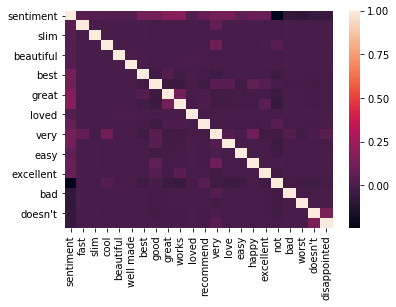

In [39]:
# Heatmap to see correlation between keywords
sns.heatmap(data_v5.corr())

In [42]:
# Create empty dataframe
count = pd.DataFrame()

# See count of how frequently words are used

count = positive.sentence.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)
count = count.sort_values()
count.tail(30)

excellent     26.0
so            26.0
sound         27.0
quality       31.0
headset       31.0
that          33.0
product       33.0
in            34.0
well          35.0
was           36.0
have          38.0
on            44.0
works         46.0
of            49.0
good          64.0
with          65.0
for           66.0
very          69.0
my            72.0
to            87.0
phone         88.0
great         94.0
this         105.0
a            106.0
is           141.0
it           145.0
i            186.0
and          189.0
the          239.0
             814.0
dtype: float64

In [ ]:
# Create empty dataframe
count = pd.DataFrame()

# See count of how frequently words are used

count = negative.sentence.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)
count = count.sort_values()
count

In [ ]:
# Create inputs for model
analysis_data = data[keywords]
target = data["sentiment"]

In [ ]:
# Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(analysis_data,target)
y_pred= bnb.predict(analysis_data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

In [43]:
# Run Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
bnb = GaussianNB()
bnb.fit(analysis_data,target)
y_pred= bnb.predict(analysis_data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

NameError: name 'analysis_data' is not defined

In [34]:
# Run IMDB data through final model

raw_data_test = pd.read_table("imdb_labelled.txt", header=None)
data_test = raw_data_test
data_test.columns=["sentence","sentiment"]

for key in v5_keywords:
    data_test[str(key)] = data_test.sentence.str.contains(' ' + str(key) + ' ',case=False)
positive_test = data_test.loc[data_test["sentiment"]== 1]
data_test["sentiment"] = (data_test["sentiment"] == 1)
analysis_data_test = data_test[v5_keywords]
target_test = data_test["sentiment"]
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(analysis_data_test,target_test)
y_pred_test= bnb.predict(analysis_data_test)
print("Number of mislabeled points out of a total {} points : {}".format(
    data_test.shape[0],
    (target_test != y_pred_test).sum()
))

Number of mislabeled points out of a total 748 points : 312


In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target_test, y_pred_test)

array([[ 81, 281],
       [ 31, 355]], dtype=int64)

In [36]:
# See count of how frequently words are used

count_test = positive_test.sentence.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)
count = count.sort_values()
count[100:]

NameError: name 'count' is not defined